## **CLASSIFICATION**
https://www.kaggle.com/code/tyw002/wine-quality-pred

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

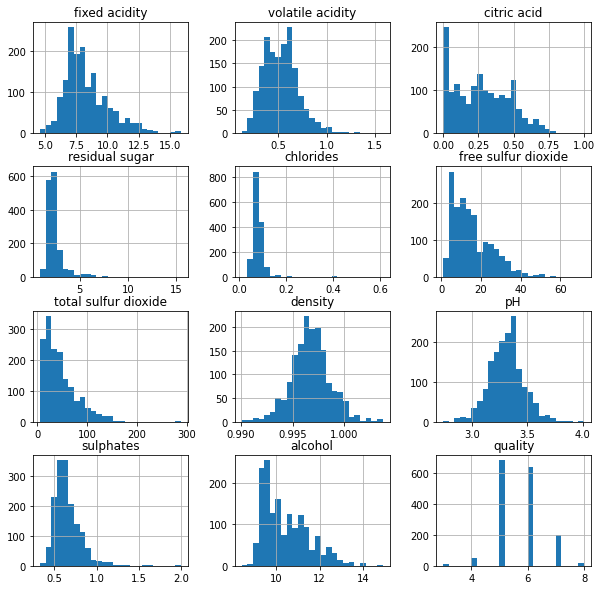

In [8]:
df.hist(bins=25, figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

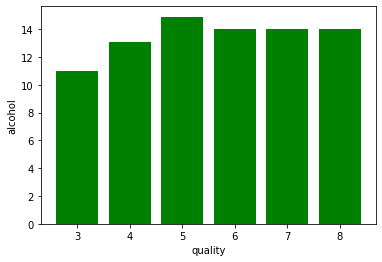

In [9]:
plt.figure()
plt.bar(df['quality'], df['alcohol'], color='green')
plt.xlabel('quality')
plt.ylabel('alcohol')

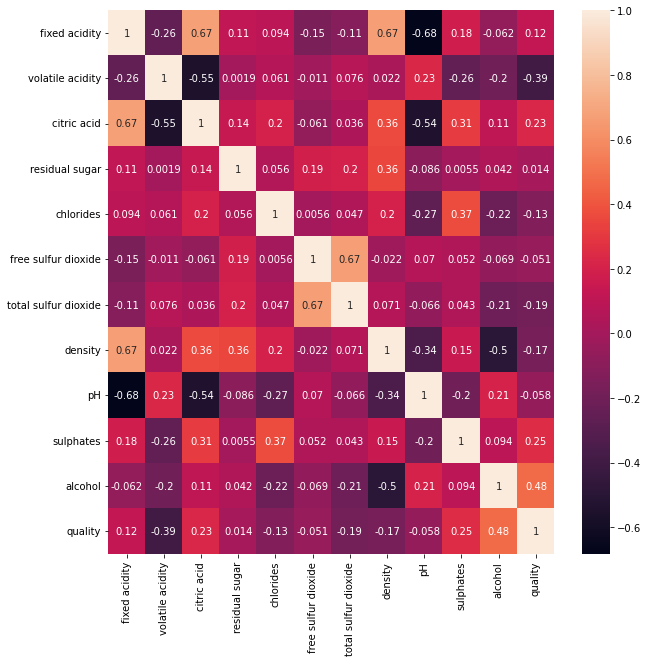

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
x = df.drop(['quality'], axis=1)
y = df['quality']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                   )

In [14]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [20]:
def models(x_train,y_train):
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  from sklearn.tree import DecisionTreeClassifier
  tr = DecisionTreeClassifier()
  tr.fit(x_train,y_train)

  from sklearn.tree import DecisionTreeRegressor
  dr = DecisionTreeRegressor()
  dr.fit(x_train,y_train)

  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)

  from sklearn.neighbors import KNeighborsClassifier
  kn = KNeighborsClassifier()
  kn.fit(x_train,y_train)

  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  print('lr',lr.score(x_train,y_train))
  print('dt',tr.score(x_train,y_train))
  # print('dtr',dr.score(x_train,y_train))
  print('rf', rf.score(x_train,y_train))
  print('kn', kn.score(x_train,y_train))
  print('xgb', xgb.score(x_train,y_train))

  return lr,tr,dr,rf,kn,xgb

In [21]:
model = models(x_train,y_train)

lr 0.6129788897576232
dt 1.0
rf 1.0
kn 0.7075840500390931
xgb 0.8115715402658327


In [22]:
y_pred = model[1].predict(x_test)
print(y_pred)

[5 5 7 5 5 5 6 5 5 5 3 5 6 6 5 5 8 6 5 6 6 6 6 5 6 6 6 5 7 6 7 6 6 6 6 7 5
 6 5 6 6 5 4 5 5 6 6 6 5 6 5 5 5 6 6 6 6 6 5 6 6 6 5 6 5 5 6 7 6 6 6 6 4 4
 6 5 6 5 5 7 7 5 6 5 5 6 4 6 6 6 5 7 6 4 5 5 5 4 6 5 8 6 6 6 5 7 6 5 5 5 7
 6 5 5 5 5 6 6 6 6 6 5 5 6 5 5 6 6 5 7 4 6 7 5 6 5 5 7 5 6 6 5 5 6 7 6 6 5
 6 7 5 5 6 5 6 6 6 7 5 6 7 5 5 6 6 6 6 6 6 5 6 5 6 6 5 6 5 6 5 6 6 5 6 5 5
 5 6 7 5 6 6 5 6 7 8 5 5 5 5 6 5 5 7 5 5 6 5 5 5 4 5 7 6 7 6 6 6 6 6 6 5 6
 4 6 5 8 5 5 5 5 6 5 6 5 5 5 6 5 6 6 6 5 6 6 5 6 5 5 5 4 6 4 6 6 6 5 6 6 5
 6 6 5 5 7 6 5 5 5 6 6 5 5 6 6 7 7 5 5 5 7 5 7 6 5 5 4 6 6 5 6 5 6 5 6 7 6
 6 5 5 5 6 5 5 5 5 6 5 7 5 5 6 6 6 6 6 5 5 5 5 6]


In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
for i in range(len(model)):
  print('Model', i)
  print('Accuracy:', accuracy_score(y_test, model[i].predict(x_test)))
  print(classification_report(y_test, model[i].predict(x_test)))
  # print(confusion_matrix(y_test, model[i].predict(x_test)))

Model 0
Accuracy: 0.565625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.58      0.76      0.66       116
           6       0.57      0.60      0.59       145
           7       0.40      0.15      0.21        41
           8       0.00      0.00      0.00         6

    accuracy                           0.57       320
   macro avg       0.26      0.25      0.24       320
weighted avg       0.52      0.57      0.53       320

Model 1
Accuracy: 0.5875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.61      0.71      0.65       116
           6       0.67      0.64      0.65       145
           7       0.41      0.29      0.34        41
           8       0.25      0.17      0.20         6

    accuracy             

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

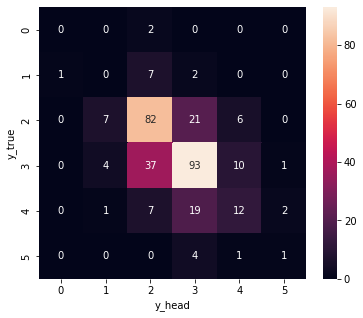

In [24]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()